#Step 3
Optimization with uncertain conversion rates

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.NoisyClairvoyant import  NoisyClairvoyant

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 150
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [3]:
n_arms = 4
n_products = 5 

TIME_HORIZON = 300
NUM_ITERATION = 5

In [4]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

UCB

In [5]:
ucb_rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ucb_super_arm = ucb1_learner.select_superarm()
        print(ucb_super_arm)
        report = environment.round(ucb_super_arm)
        ucb1_learner.update(ucb_super_arm.copy(), report)
    ucb_rewards = ucb1_learner.history_rewards
    ucb_rewards_iterations.append(np.array(ucb_rewards))
ucb_rewards_iterations = np.array(ucb_rewards_iterations)
ucb_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 2, 1, 2]
[3, 0, 1, 1, 2]
[2, 3, 1, 1, 1]
[0, 1, 0, 1, 1]
[2, 3, 1, 1, 2]
[3, 3, 3, 1, 2]
[2, 2, 1, 1, 2]
[2, 3, 2, 1, 0]
loading: [=                             ] 3.3%
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 3]
[3, 3, 2, 0, 2]
[2, 3, 1, 1, 2]
[2, 3, 0, 0, 2]
[2, 0, 3, 1, 2]
[3, 3, 1, 1, 2]
[2, 3, 1, 2, 1]
[2, 3, 2, 1, 2]
[3, 3, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 1, 1, 3, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 3]
[3, 3, 1, 1, 2]
[2, 2, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 3, 1, 2]
loading: [===                           ] 10.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[3, 2, 1, 1, 1]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
loading: [====                          ] 13.3%
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[1, 3, 1, 1, 2]
[2, 3, 0, 1, 1]
[2, 3, 1, 1, 

[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[3, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[3, 3, 1, 1, 2]
loading: [==========                    ] 33.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 0, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
loading: [===========                   ] 36.7%
[3, 3, 1, 1, 2]
[2, 3, 1, 3, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [============                  ] 40.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 3]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=============                 ] 43.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [==============

[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [===================           ] 63.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [====================          ] 66.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=====================         ] 70.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [======================        ] 73.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=======================       ] 76.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1

[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [============================= ] 96.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[3, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
Iteration # 5
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 2]
[3, 0, 0, 1, 2]
[0, 3, 3, 1, 2]
[2, 3, 2, 1, 1]
[3, 3, 1, 1, 2]
[2, 3, 1, 1, 3]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=                             ] 3.3%
[2, 2, 1, 1, 1]
[2, 3, 3, 1, 2]
[2, 3, 2, 1, 0]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 0, 0, 2]
[2, 3, 1, 1, 2]
[3, 3, 1, 1, 2]
[2, 3, 1, 3, 2]
[1, 3, 1, 1, 1]
loading: [==                            ] 6.7%
[2, 0, 1, 2, 2]
[2, 3, 1, 1, 2]
[2, 2, 2, 1, 2]
[2, 1, 1, 1, 3]
[2, 3, 3, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 

(5, 300)

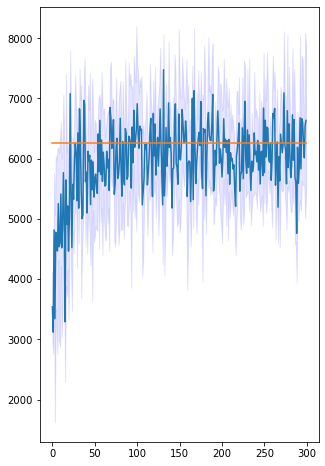

In [6]:
plt.figure(figsize=(5, 8))
mean = np.mean(ucb_rewards_iterations, axis=0)
stdev = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards))])
plt.show()

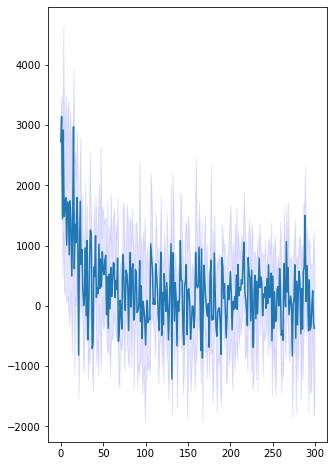

In [7]:
plt.figure(figsize=(5,8))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_mean_regret = np.mean(ucb_regret, axis=0)
ucb_stdev_regret = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(ucb_mean_regret)), ucb_mean_regret)
plt.fill_between(range(len(ucb_mean_regret)), (ucb_mean_regret-ucb_stdev_regret), (ucb_mean_regret+ucb_stdev_regret), color='b', alpha=.1)
plt.show()

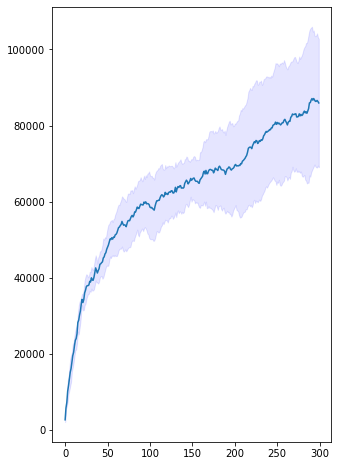

In [8]:
plt.figure(figsize=(5,8))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_cumulative_regret = np.cumsum(ucb_regret, axis=1)
ucb_cum_reg_mean = np.mean(ucb_cumulative_regret, axis=0)
ucb_cum_reg_stdev = np.std(ucb_cumulative_regret, axis=0)

plt.plot(range(len(ucb_cum_reg_mean)), ucb_cum_reg_mean)
plt.fill_between(range(len(ucb_cum_reg_mean)), (ucb_cum_reg_mean-ucb_cum_reg_stdev), (ucb_cum_reg_mean+ucb_cum_reg_stdev), color='b', alpha=.1)

plt.show()

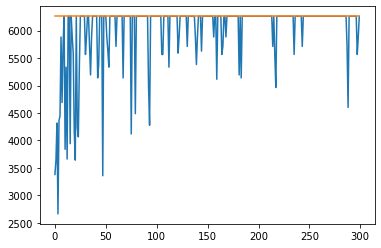

In [9]:
ucb_pulled_arms = ucb1_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ucb_pulled_arms]

plt.plot([i for i in range(len(ucb_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards)) ])
plt.show()


TS

In [10]:
ts_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ts_super_arm = ts_learner.select_superarm()
        print(ts_super_arm)
        report = environment.round(ts_super_arm)
        ts_learner.update(ts_super_arm.copy(), report)
    ts_rewards = ts_learner.history_rewards
    ts_rewards_iterations.append(np.array(ts_rewards))
ts_rewards_iterations = np.array(ts_rewards_iterations)
ts_rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
[1, 2, 3, 2, 3]
[3, 1, 2, 3, 2]
[0, 3, 0, 1, 2]
[3, 0, 1, 1, 1]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 0]
[2, 3, 1, 1, 2]
loading: [=                             ] 3.3%
[2, 3, 1, 0, 2]
[2, 3, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [===                           ] 10.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [====                          ] 13.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1,

[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [==========                    ] 33.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [===========                   ] 36.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [============                  ] 40.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=============                 ] 43.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [==============

[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [===================           ] 63.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [====================          ] 66.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=====================         ] 70.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [======================        ] 73.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=======================       ] 76.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1

[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [============================= ] 96.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]

Iteration # 5
loading: [                              ] 0.0%
[0, 3, 1, 1, 1]
[3, 1, 2, 3, 2]
[1, 3, 0, 0, 2]
[3, 2, 3, 1, 0]
[2, 3, 1, 1, 3]
[3, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 0, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=                             ] 3.3%
[2, 3, 1, 2, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1,

(5, 300)

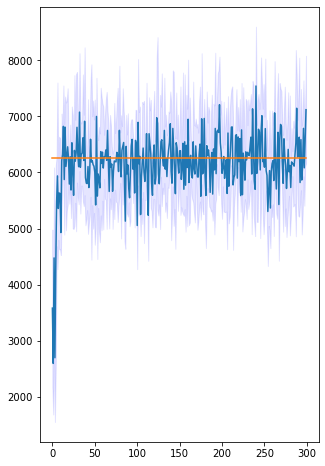

In [11]:
plt.figure(figsize=(5, 8))
mean = np.mean(ts_rewards_iterations, axis=0)
stdev = np.std(ts_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards))])
plt.show()

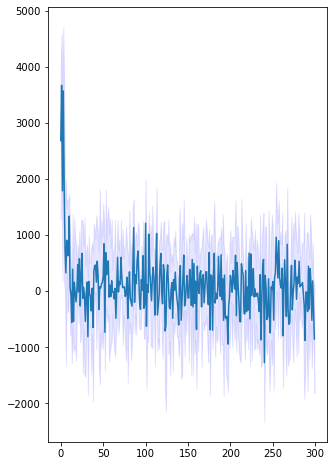

In [12]:
plt.figure(figsize=(5,8))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_mean_regret = np.mean(ts_regret, axis=0)
ts_reg_stdev = np.std(ts_regret, axis=0)

plt.plot(range(len(ts_mean_regret)), ts_mean_regret)
plt.fill_between(range(len(ts_mean_regret)), (ts_mean_regret-ts_reg_stdev), (ts_mean_regret+ts_reg_stdev), color='b', alpha=.1)
plt.show()

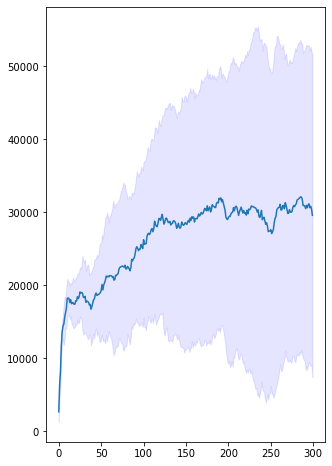

In [13]:
plt.figure(figsize=(5,8))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_cumulative_regret = np.cumsum(ts_regret, axis=1)
ts_cum_reg_mean = np.mean(ts_cumulative_regret, axis=0)
ts_cum_reg_stdev = np.std(ts_cumulative_regret, axis=0)

plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.fill_between(range(len(ts_cum_reg_mean)), (ts_cum_reg_mean-ts_cum_reg_stdev), (ts_cum_reg_mean+ts_cum_reg_stdev), color='b', alpha=.1)
plt.show()

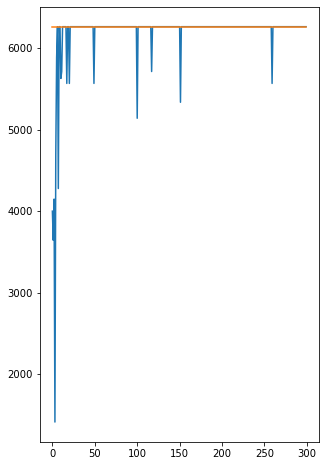

In [14]:
ts_pulled_arms = ts_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ts_pulled_arms]

plt.figure(figsize=(5,8))
plt.plot([i for i in range(len(ts_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards)) ])
plt.show()


In [24]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = (th_rews[-1] - th_rews[-2]) / today_customer
seen = np.array(ts_learner.history_interactions)
theoretical_regret = 1024 * np.log(seen)/delta_arms

[ 5.22035583  5.83773045  6.25382881  6.53233429  6.76619171  6.96413561
  7.1553963   7.28276118  7.39079852  7.49720722  7.58120983  7.67042852
  7.7651449   7.83518376  7.90100705  7.96797318  8.02715011  8.08886879
  8.15507489  8.20631073  8.24957515  8.29354952  8.34498037  8.39162997
  8.43337671  8.46926266  8.50451314  8.54266599  8.57300626  8.61013694
  8.647695    8.68067166  8.71980745  8.745762    8.77462222  8.80492526
  8.83185794  8.8596475   8.88613262  8.91139511  8.93577194  8.96149432
  8.98469369  9.01005849  9.02965747  9.04970203  9.07303042  9.09391891
  9.11217612  9.13140538  9.15218146  9.17201526  9.19187086  9.20753644
  9.22581994  9.24271075  9.26245833  9.27995971  9.29679326  9.3123553
  9.32874544  9.34443411  9.35979433  9.37492217  9.3899917   9.40598939
  9.4197906   9.43508264  9.45140242  9.46560255  9.47845729  9.49295965
  9.50643694  9.521275    9.53474003  9.54859673  9.56078595  9.57533065
  9.58973525  9.60353045  9.61787001  9.63043133  9.

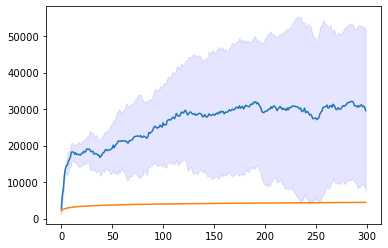

In [21]:
plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.fill_between(range(len(ts_cum_reg_mean)), (ts_cum_reg_mean-ts_cum_reg_stdev), (ts_cum_reg_mean+ts_cum_reg_stdev), color='b', alpha=.1)
plt.plot(range(len(theoretical_regret)), theoretical_regret)
plt.show()